In [3]:
import sys, os
sys.path.append(os.pardir)
from mnist import load_mnist

In [5]:
(x_train, t_train), (x_test, t_test) = load_mnist(flatten=True, normalize=False)

Done
Done
Done
Done
Converting train-images-idx3-ubyte.gz to NumPy Array ...
Done
Converting train-labels-idx1-ubyte.gz to NumPy Array ...
Done
Converting t10k-images-idx3-ubyte.gz to NumPy Array ...
Done
Converting t10k-labels-idx1-ubyte.gz to NumPy Array ...
Done
Creating pickle file ...
Done!


In [7]:
print(x_train.shape)
print(t_train.shape)

(60000, 784)
(60000,)


In [8]:
print(x_test.shape)
print(t_test.shape)

(10000, 784)
(10000,)


In [9]:
import numpy as np
from PIL import Image

In [10]:
def img_show(img):
    pil = Image.fromarray(np.uint8(img))
    pil.show()
    
img = x_train[0]
label = t_train[0]
print(label)

5


In [11]:
print(img.shape)

(784,)


In [12]:
img = img.reshape(28, 28)
img.shape

(28, 28)

In [13]:
img_show(img)

In [14]:
def get_data():
    (x_train, y_train), (x_test, y_test) = load_mnist(normalize=True, flatten=True, one_hot_label=False)
    return x_test, y_test

In [15]:
def init_network():
    with open('sample_weight.pkl', 'rb') as f:
        network = pickle.load(f)
    return network

In [17]:
def sigmoid(x):
    return 1 / (1 + np.exp(x))

In [18]:
def softmax(x):
    c = np.max(x)
    e = np.exp(x-c)
    s = np.sum(e)
    return e / s

In [22]:
import pickle

In [26]:
def predict(network, x):
    W1, W2, W3 = network['W1'], network['W2'], network['W3']
    b1, b2, b3 = network['b1'], network['b2'], network['b3']
    
    a1 = np.dot(x, W1) + b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1, W2) + b2
    z2 = sigmoid(a2)
    a3 = np.dot(z2, W3) + b3
    y = softmax(a3)
    
    return y

In [27]:
x, t = get_data()
network = init_network()

In [28]:
accuracy_cnt = 0
for i in range(len(x)):
    y = predict(network, x[i])
    p = np.argmax(y)
    if p == t[i]:
        accuracy_cnt += 1

In [30]:
print("Accuracy: " + str(float(accuracy_cnt) / len(x)))

Accuracy: 0.7967


In [31]:
x, _ = get_data()

In [32]:
network = init_network()

In [33]:
W1, W2, W3 = network['W1'], network['W2'], network['W3']

In [34]:
x.shape

(10000, 784)

In [35]:
x[0].shape

(784,)

In [36]:
W1.shape

(784, 50)

In [37]:
W2.shape

(50, 100)

In [38]:
W3.shape

(100, 10)

In [39]:
x, t = get_data()
network = init_network()

batch_size = 100
accuracy_cnt = 0

In [40]:
for i in range(0, len(x), batch_size):
    x_batch = x[i:i+batch_size]
    y_batch = predict(network, x_batch)
    p = np.argmax(y_batch, axis=1)
    accuracy_cnt += np.sum(p == t[i:i+batch_size])

In [41]:
print("Accuracy: " + str(float(accuracy_cnt) / len(x)))

Accuracy: 0.7967


In [42]:
x = np.array([[0.1, 0.8, 0.1], [0.3, .1, .6], [.2, .5, .3], [.8, .1, .1]])
x

array([[0.1, 0.8, 0.1],
       [0.3, 0.1, 0.6],
       [0.2, 0.5, 0.3],
       [0.8, 0.1, 0.1]])

In [43]:
y = np.argmax(x, axis=1)
y

array([1, 2, 1, 0])

In [45]:
z = np.argmax(x, axis=0)
z

array([3, 0, 1])

In [50]:
x = np.array([
    [
        [1, 2, 3],
        [2, 3, 5],
        [7, 3, 2]
    ],
    [
        [6, 4, 4],
        [.5, 3.4, 5.5],
        [0, 5., 5.1],
    ],
    [
        [.2, .5, .6],
        [1, 11, 111],
        [2, 4., 5]
    ]
])
x

array([[[  1. ,   2. ,   3. ],
        [  2. ,   3. ,   5. ],
        [  7. ,   3. ,   2. ]],

       [[  6. ,   4. ,   4. ],
        [  0.5,   3.4,   5.5],
        [  0. ,   5. ,   5.1]],

       [[  0.2,   0.5,   0.6],
        [  1. ,  11. , 111. ],
        [  2. ,   4. ,   5. ]]])

In [51]:
x.shape

(3, 3, 3)

In [52]:
np.ndim(x)

3

In [53]:
x[0]

array([[1., 2., 3.],
       [2., 3., 5.],
       [7., 3., 2.]])

In [54]:
a1 = np.argmax(x, axis=0)
a1

array([[1, 1, 1],
       [0, 2, 2],
       [0, 1, 1]])

In [55]:
a2 = np.argmax(x, axis=1)
a2

array([[2, 1, 1],
       [0, 2, 1],
       [2, 1, 1]])

In [56]:
a3 = np.argmax(x, axis=2)
a3

array([[2, 2, 0],
       [0, 2, 2],
       [2, 2, 2]])

In [57]:
x[0][0]

array([1., 2., 3.])

In [58]:
import matplotlib.pyplot as plt

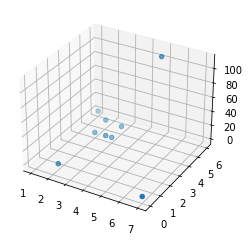

In [60]:
fig = plt.figure()
ax = plt.axes(projection='3d')

ax.scatter3D(x[0], x[1], x[2], 'gray')

In [62]:
A1 = np.max(x, axis=0)
A1

array([[  6. ,   4. ,   4. ],
       [  2. ,  11. , 111. ],
       [  7. ,   5. ,   5.1]])

In [63]:
A2 = np.max(x, axis=1)
A2

array([[  7. ,   3. ,   5. ],
       [  6. ,   5. ,   5.5],
       [  2. ,  11. , 111. ]])

In [64]:
A3 = np.max(x, axis=2)
A3

array([[  3. ,   5. ,   7. ],
       [  6. ,   5.5,   5.1],
       [  0.6, 111. ,   5. ]])

In [65]:
A4 = np.max(x, axis=3)
A4

AxisError: axis 3 is out of bounds for array of dimension 3

In [79]:
y = np.array([1, 2, 1, 0])
x = np.array([1, 2, 0, 0])
# print(y == t)
np.array_equal(y, x)

False

In [80]:
np.sum(np.array_equal(y, x))

0

In [81]:
np.sum(y==x)

3